# Animacje w matplotlib

Do animacji *bar chart race* wykorzystamy typ `ArtistAnimation` w `matplotlib` (drugim rodzajem jest `FunctionAnimation`). W tym celu musimy utworzyć kontenerek (listę) obiektów `Artist`, będących pojedynczymi klatkami, z których Python utworzy animację.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

A=np.random.randint(0,350,300)
B=np.random.randint(50,200,300)
C=np.random.randint(20,300,300)
A.sort()
B.sort()
C.sort()

W celu faktycznego utworzenia animacji wykorzystamy funkcję `animation.ArtistAnimation(fig,artists)` o następujących argumentach:

- `fig` - obiekt typu `Figure` potrzebny do faktycznego utworzenia grafiki
- `artists` - lista naszych klatek animacji
- `interval` - opóźnienie między klatkami (w milisekundach)
- `repeat` - jeżeli `True` dostaniemy zapętloną animację
- `repeat_delay` - opóźnienie w milisekundach pomiędzy kolejnymi wywołaniami animacji

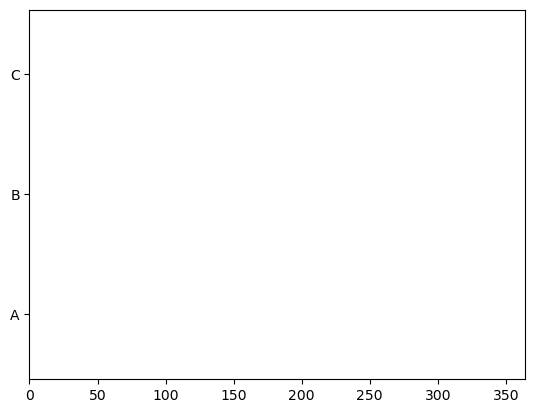

In [2]:
fig, ax = plt.subplots() #subplots zwraca tuplę: obiekt Figure i obiekt Axes

x = np.array(['A', 'B', 'C'])

#Tworzenie listy obiektów `Artist` - każda klatka to `barplot` trzech zbiorów danych 

artists = []
colors = ['blue', 'red', 'green']
for i in range(300):
    data = [A[i],B[i],C[i]]
    container = ax.barh(x, data, color=colors)
    artists.append(container)

ani = animation.ArtistAnimation(fig=fig, artists=artists, interval=10)
ani.save('ani.gif',writer='pillow')

Drugi rodzaj (właściwy) *bar chart race* to sytuacja, gdy słupki danych są zawsze uporzadkowane od największego do najmniejszego lub odwrotnie. Wymaga to modyfikacji funkcji tworzącej listę klatek.

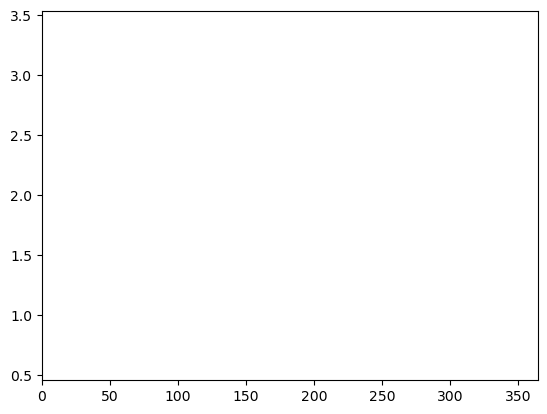

In [3]:
import pandas as pd

fig, ax = plt.subplots()

x = [1, 2, 3]
names = ['A','B','C']
dane=pd.Series([A,B,C])


artists = []
cls = ['blue', 'red', 'green']
for i in range(300):
    dane = pd.Series([A[i],B[i],C[i]])
    srt = list(dane.argsort())
    cls_sort = [cls[j] for j in srt]
    names_sort = [names[j] for j in srt]
    dane_sort = dane.sort_values()
    container = ax.barh(x, dane_sort, color=cls_sort,label=names_sort)
    artists.append(container)

ani2 = animation.ArtistAnimation(fig=fig, artists=artists, interval=10)
ani2.save('ani2.gif',writer='pillow')

## Projekt.

Opracować dane dotyczące liczby szczepień pierwszą dawką w państwach EU w postaci wybranej wersji *bar chart race*.

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv("data.csv")
countries = np.array(['FR', 'DE', 'ES', 'CZ'])
FirstDose = np.array([
    np.cumsum(
        data.loc[data['ReportingCountry'] == country].sort_values(by = "YearWeekISO")[['FirstDose','YearWeekISO']].groupby('YearWeekISO').sum()
    )for country in countries])

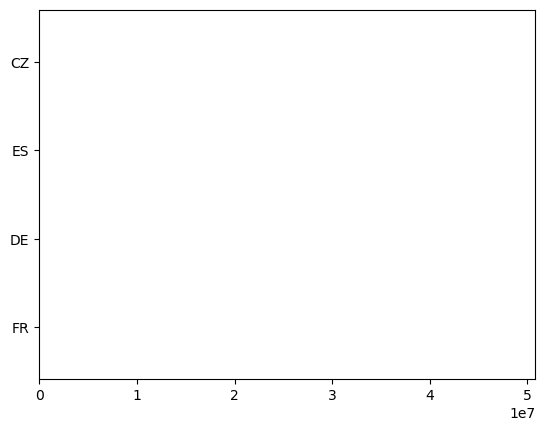

In [113]:

fig, ax = plt.subplots()

cls = ['blue', 'red', 'green','yellow']
for i in range(len(FirstDose[0])):
    container = ax.barh(countries, FirstDose[:,i].flat[:], color=colors)
    artists.append(container)

ani = animation.ArtistAnimation(fig=fig, artists=artists, interval=30)
ani.save('ani.gif',writer='pillow')

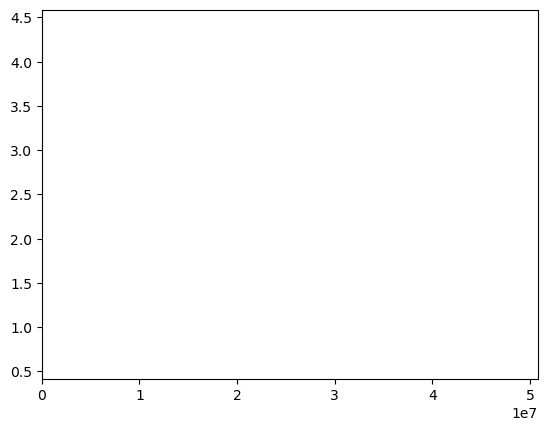

In [114]:
fig, ax = plt.subplots()
x=[1,2,3,4]
cls = ['blue', 'red', 'green',"yellow"]
for i in range(len(FirstDose[0])):
    dane = pd.Series(FirstDose[:,i].flat[:])
    srt = list(dane.argsort())
    cls_sort = [cls[j] for j in srt]
    names_sort = [countries[j] for j in srt]
    dane_sort = dane.sort_values()
    container = ax.barh(x, dane_sort, color=cls_sort,label=names_sort)
    artists.append(container)

ani2 = animation.ArtistAnimation(fig=fig, artists=artists, interval=30)
ani2.save('ani2.gif',writer='pillow')